In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv")
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.set_index('date')

# Clean data
df = df.loc[(df['value'] <= df['value'].quantile(0.975)) &
            (df['value'] >= df['value'].quantile(0.025))]

df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


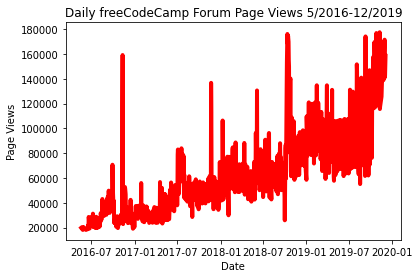

In [5]:
# Draw line plot
fig, ax = plt.subplots()
ax.plot(df.index, df['value'], label='Línea 1', linewidth=4, color='red')
ax.set(xlabel='Date', ylabel='Page Views',
       title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
# Save image and return fig (don't change this part)
fig.savefig('line_plot.png')


In [ ]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar.reset_index(inplace=True)
df_bar['Years'] = pd.DatetimeIndex(df_bar.date).year
df_bar['Months'] = pd.DatetimeIndex(df_bar.date).month
df_bar = df_bar.sort_values(by=['Months'])
df_bar['Months'] = pd.DatetimeIndex(df_bar.date).month_name()
# Draw bar plot
fig, ax = plt.subplots()
g = sns.catplot(x="Years", y="value", palette="bright",
                ci=None, hue="Months", kind="bar", legend=False, data=df_bar)
g.set(xlabel='Years', ylabel='Average Page Views')
plt.legend(loc='upper left')
g.set_xticklabels(rotation=90)
fig = g.fig    # Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')